In [1]:
import pandas as pd
import numpy as np

In [2]:
crime_anal_police = pd.read_csv('./data/서울시 5대 범죄 발생현황 통계.txt', sep='\t', encoding='utf8')
crime_anal_police.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,"103,668","74,805",136,128,136,133,"6,469","6,007","42,204","21,284","54,723","47,253"
2,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
3,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
4,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"


In [3]:
crime_anal_police = crime_anal_police.rename({'자치구':'구별',
                                              '합계':'합계 발생', '합계.1':'합계 검거',
                                              '살인':'살인 발생', '살인.1':'살인 검거',
                                              '강도':'강도 발생', '강도.1':'강도 검거',
                                              '강간강제추행':'강간강제추행 발생', '강간강제추행.1':'강간강제추행 검거',
                                              '절도':'절도 발생', '절도.1':'절도 검거',
                                              '폭력':'폭력 발생', '폭력.1':'폭력 검거'}
                                              , axis='columns')
crime_anal_police.head()

,기간,구별,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,"103,668","74,805",136,128,136,133,"6,469","6,007","42,204","21,284","54,723","47,253"
2,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
3,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
4,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"


In [4]:
del crime_anal_police['기간']

In [5]:
crime_anal_police = crime_anal_police.drop([0,1])
crime_anal_police.head()

,구별,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
2,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
3,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
4,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
5,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
6,광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"


In [6]:
crime_anal_police.to_csv('./data/crime_in_seoul.csv', sep=',', encoding='utf8')

### pivot_table 연습

In [7]:
df = pd.read_excel('./data/salesfunnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [8]:
pd.pivot_table(df,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [9]:
pd.pivot_table(df,index=["Name", "Rep", "Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [10]:
pd.pivot_table(df,index=["Manager", "Rep"], values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [11]:
pd.pivot_table(df,index=["Manager", "Rep"], values=["Price"], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [12]:
pd.pivot_table(df, index=["Manager", "Rep", "Product"], values=["Price", "Quantity"], aggfunc=[np.sum,np.mean], fill_value=0, margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

### 다시 문제로

In [13]:
crime_anal = crime_anal_police.copy()
crime_anal = crime_anal.set_index(crime_anal_police['구별'])
del crime_anal['구별']
crime_anal.head()

,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,,,
종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"


In [14]:
crime_anal['합계 발생'] = crime_anal['합계 발생'].str.replace(',', '')
crime_anal['합계 검거'] = crime_anal['합계 검거'].str.replace(',', '')
crime_anal['살인 발생'] = crime_anal['살인 발생'].str.replace(',', '')
crime_anal['살인 검거'] = crime_anal['살인 검거'].str.replace(',', '')
crime_anal['강도 발생'] = crime_anal['강도 발생'].str.replace(',', '')
crime_anal['강도 검거'] = crime_anal['강도 검거'].str.replace(',', '')
crime_anal['강간강제추행 발생'] = crime_anal['강간강제추행 발생'].str.replace(',', '')
crime_anal['강간강제추행 검거'] = crime_anal['강간강제추행 검거'].str.replace(',', '')
crime_anal['절도 발생'] = crime_anal['절도 발생'].str.replace(',', '')
crime_anal['절도 검거'] = crime_anal['절도 검거'].str.replace(',', '')
crime_anal['폭력 발생'] = crime_anal['폭력 발생'].str.replace(',', '')
crime_anal['폭력 검거'] = crime_anal['폭력 검거'].str.replace(',', '')
crime_anal.head()

,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,,,
종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [15]:
crime_anal = crime_anal.astype(int)
crime_anal.head()

,합계 발생,합계 검거,살인 발생,살인 검거,강도 발생,강도 검거,강간강제추행 발생,강간강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,,,
종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [16]:
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['강간검거율'] = crime_anal['강간강제추행 검거'] / crime_anal['강간강제추행 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

del crime_anal['살인 검거']
del crime_anal['강도 검거']
del crime_anal['강간강제추행 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']
del crime_anal['합계 발생']
del crime_anal['합계 검거']

crime_anal.head()

,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [17]:
con_list = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

crime_anal.head()

,살인 발생,강도 발생,강간강제추행 발생,절도 발생,폭력 발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


In [18]:
crime_anal = crime_anal.rename({'살인 발생':'살인',
                                       '강도 발생':'강도',
                                       '강간강제추행 발생':'강간강제추행',
                                       '절도 발생':'절도',
                                       '폭력 발생':'폭력'}, axis='columns')
crime_anal.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,100.000000,83.333333,78.021978,53.760000,85.536967


In [19]:
from sklearn import preprocessing

col = ['살인','강도','강간강제추행','절도','폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967


In [20]:
result_CCTV = pd.read_csv('./data/cctv2.csv', index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,1047.296706,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,522.266940,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,1395.934533,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,218.097087,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,NaN,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


In [21]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581


In [22]:
col = ['살인','강도','강간강제추행','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544,1.557245
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063,1.054975
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679,1.215161
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581,1.680980


In [23]:
col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)

In [24]:
crime_anal_norm

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591,461.435216
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544,1.557245,324.955196
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063,1.054975,431.125118
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679,1.215161,395.425187
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581,1.680980,400.652278
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100.000000,90.000000,85.119048,54.016982,92.716237,358679,2003,1.844216,421.852267
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100.000000,100.000000,78.260870,54.501801,86.000000,400989,1068,1.953152,418.762670
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.000000,100.000000,73.863636,67.560074,90.266584,449871,3003,0.752594,431.690294
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100.000000,66.666667,82.386364,54.027665,91.006601,313550,1265,1.403221,394.087296


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### seaborn연습

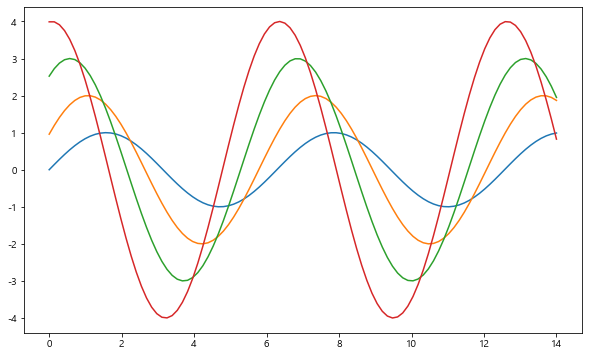

In [26]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

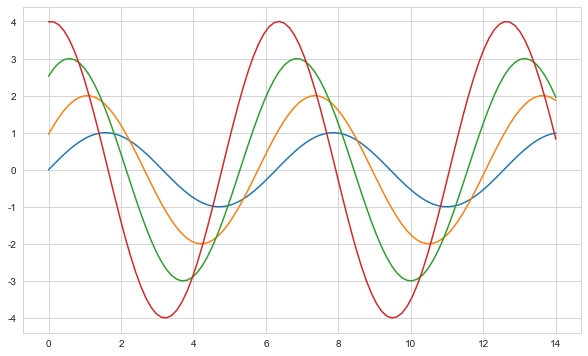

In [27]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

In [28]:
sns.set_style("whitegrid")
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


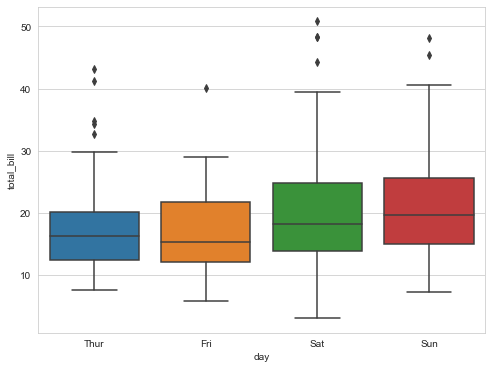

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

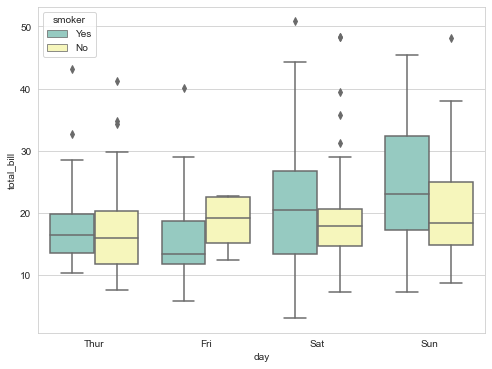

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")
plt.show()

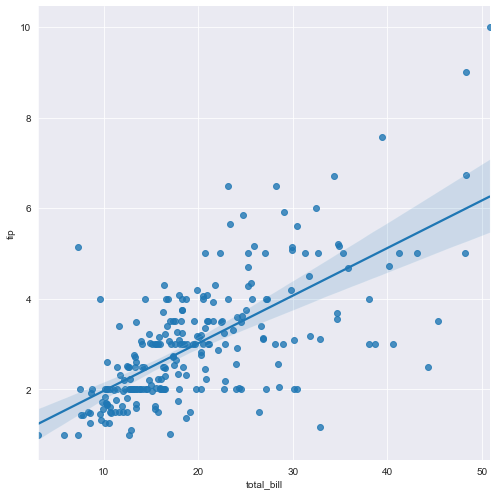

In [31]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, size=7)
plt.show()

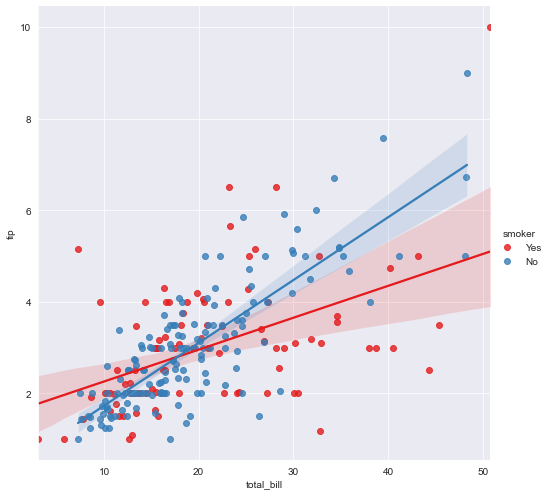

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", size=7)
plt.show()

In [33]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [34]:
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<function matplotlib.pyplot.show(*args, **kw)>

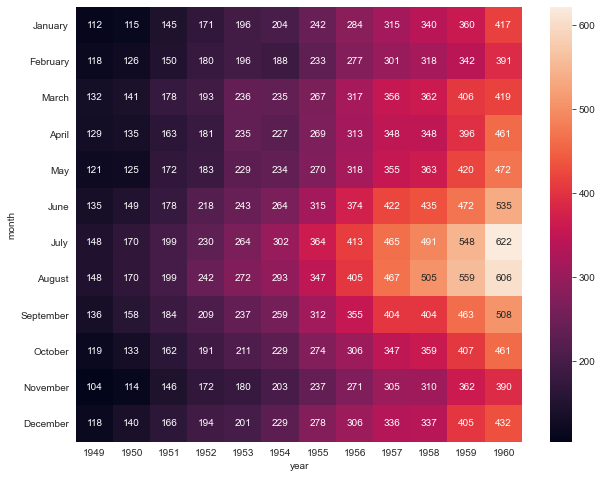

In [35]:
#  annot=True : 각 셀에 숫자를 입력
# fmt='d' 는 정수 형태(integer format)로 숫자를 입력
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d")
plt.show

In [36]:
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


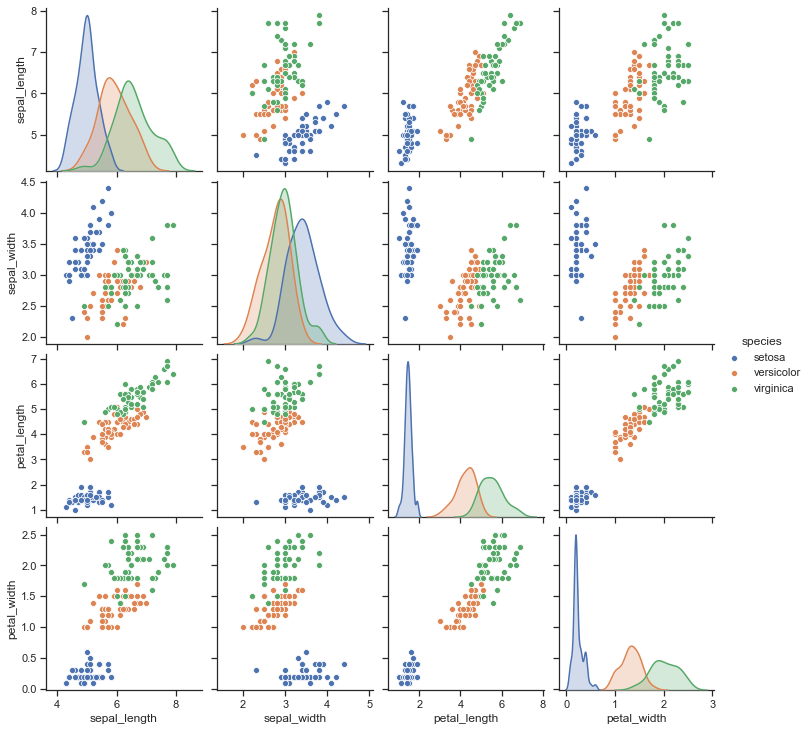

In [37]:
sns.pairplot(iris, hue="species")
plt.show()

### 다시 문제로

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})

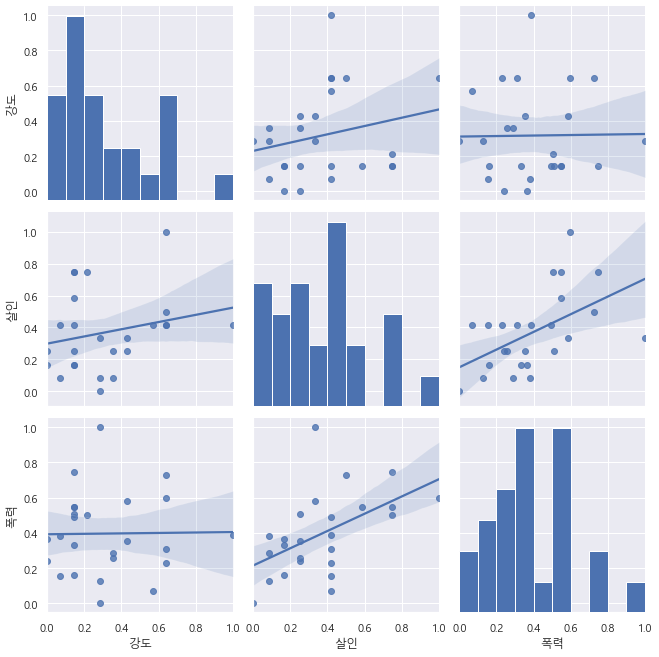

In [39]:
# 강도, 살인, 폭력간의 상관관계
# reg = 회귀선그래프
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', size=3)
plt.show()

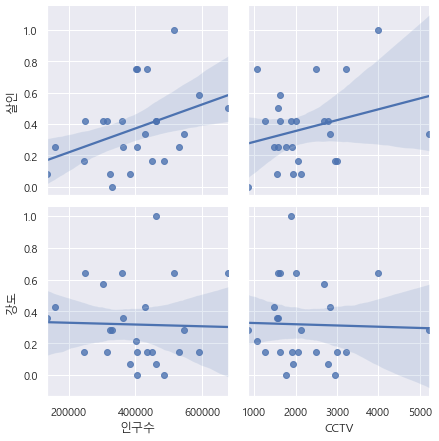

In [40]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'],
             y_vars=['살인', '강도'], kind='reg', size=3)
plt.show()

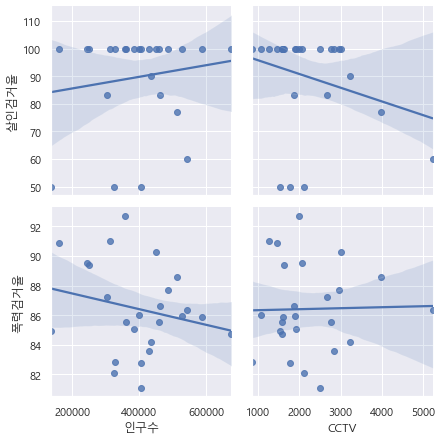

In [41]:
sns.pairplot(crime_anal_norm,
             x_vars=['인구수', 'CCTV'],
             y_vars=['살인검거율', '폭력검거율'],
             kind='reg', size=3)
plt.show()

In [42]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.0,100.0,100.000000,70.561056,90.874159,159842,1471,1.620591,100.000000
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100.0,100.0,83.505155,62.428115,87.718470,485842,2962,1.069613,93.978900
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.0,100.0,73.863636,67.560074,90.266584,449871,3003,0.752594,93.553825
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.0,100.0,87.132353,54.454454,89.538310,244953,2063,1.054975,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.0,100.0,92.222222,49.873418,82.843137,329300,858,0.285714,92.090669


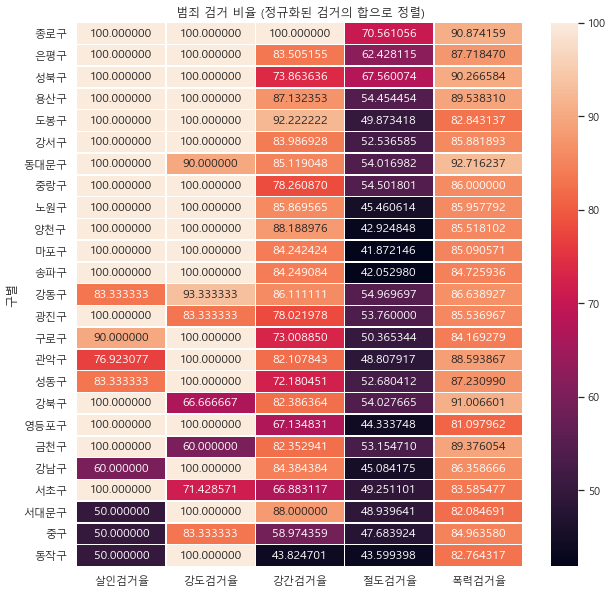

In [43]:
target_col = ['살인검거율','강도검거율','강간검거율','절도검거율','폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

In [44]:
crime_anal_norm.head()

,살인,강도,강간강제추행,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591,100.000000
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,135321,1544,1.557245,70.422713
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,100.000000,87.132353,54.454454,89.538310,244953,2063,1.054975,93.431343
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,100.000000,72.180451,52.680412,87.230990,302695,2679,1.215161,85.694627
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100.000000,83.333333,78.021978,53.760000,85.536967,361923,1581,1.680980,86.827417


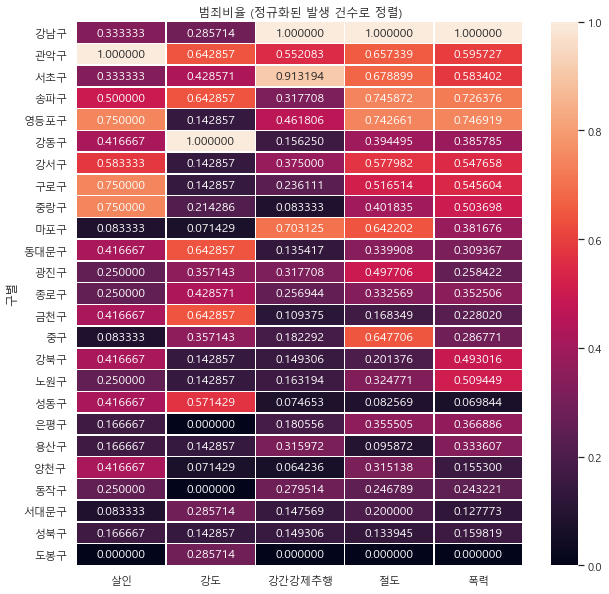

In [45]:
target_col = ['살인','강도','강간강제추행','절도','폭력']

# crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

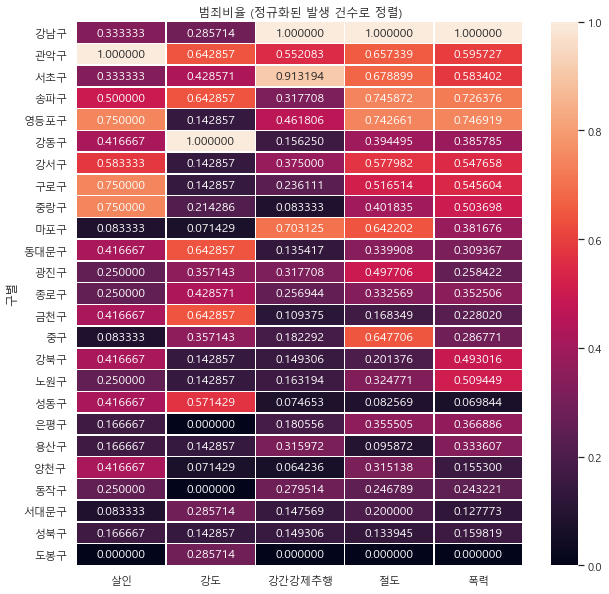

In [46]:
target_col = ['살인','강도','강간강제추행','절도','폭력']

crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [47]:
crime_anal_norm.to_csv('./data/crime_in_seoul_final.csv', sep=',', encoding='utf8')

### folium 연습

In [48]:
import folium

In [49]:
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

In [50]:
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
stamen

In [51]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles='stamen Toner', zoom_start=13)
stamen

In [52]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', zoom_start=13)
folium.Marker([45.5244, -122.6699],
              popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5215, -122.6261],
                    radius=50,
                    popup='Laurelhurst Park',
                    color='#3186cc',
                    fill_color='#3186cc').add_to(map_2)
map_2

In [53]:
state_unemployment = './data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [54]:
state_geo = './data/02. folium_us-states.json'

map = folium.Map(location=[40,-98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
               columns=['State', 'Unemployment'],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='Unemployment Rate (%)')
map

### 다시 문제로

In [55]:
import json

In [56]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [57]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data= crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

In [58]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data= crime_anal_norm['강간강제추행'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간강제추행']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

In [59]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data= crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

In [60]:
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd',
               key_on='feature.id')
map

In [61]:
import requests
from urllib.parse import urlparse, quote
import folium

In [62]:
police_list = [
    '강남경찰서', '동작경찰서', '방배경찰서', '강동경찰서', '강서경찰서',
    '관악경찰서', '구로경찰서', '남대문경찰서', '금천경찰서', '노원경찰서',
    '도봉경찰서', '혜화경찰서', '광진경찰서', '마포경찰서', '방배경찰서',
    '강북경찰서', '서부경찰서', '서대문경찰서', '서초경찰서', '성동경찰서', 
    '성북경찰서', '송파경찰서', '수서경찰서', '양천경찰서', '영등포경찰서',
    '용산경찰서', '은평경찰서', '종로경찰서', '종암경찰서', '중랑경찰서',
    '중부경찰서', '동대문경찰서']

In [63]:
key_fd = open('kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [64]:
i = '강남경찰서'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(i)
result = requests.get(url, headers={"Authorization": "KakaoAK "+ kmap_key}).json()
result['documents'][0]['y']

'37.5093899463715'

In [65]:
lat_list=[]; lng_list=[]

for i in police_list:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(i)
    result = requests.get(url, headers={"Authorization": "KakaoAK "+ kmap_key}).json()
    
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])
    lat_list.append(lat)
    lng_list.append(lng)

In [66]:
police_data = pd.DataFrame({
    'police_name':police_list,
    'lat':lat_list,
    'lng':lng_list,
})
police_data.head()

,police_name,lat,lng
0,강남경찰서,37.509390,127.067071
1,동작경찰서,37.513147,126.942857
2,방배경찰서,37.481559,126.983009
3,강동경찰서,37.528673,127.126890
4,강서경찰서,37.539784,126.829986


In [67]:
police_data['lat'][0]

37.5093899463715

In [68]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data= crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in police_data.index:
    folium.CircleMarker([police_data['lat'][i], police_data['lng'][i]],
                        radius=10,
                        color='#3186cc',
                        fill_color='#3186cc',
                        tooltip=police_data['police_name'][i]).add_to(map)
map